In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import seaborn as sns

In [11]:
df=pd.read_csv('multiple_linear_regression_dataset.csv')
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [12]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [14]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [15]:
X=df[['age','experience']]
y=df['income']

In [16]:
print(X.shape)
print(y.shape)

(20, 2)
(20,)


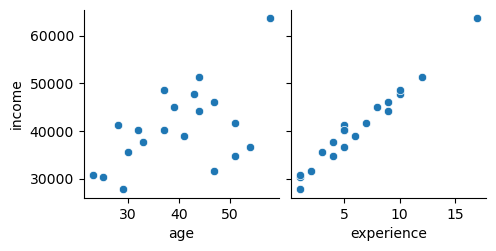

In [17]:
sns.pairplot(df,x_vars=["age","experience"],y_vars=["income"])
plt.show()

In [18]:
df.corr()

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


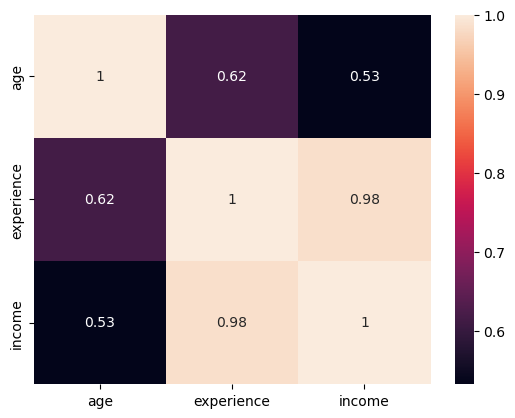

In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [20]:
y = y.values.reshape(-1,1)
print("y shape: ",y.shape)

y shape:  (20, 1)


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14, 2)
(6, 2)
(14, 1)
(6, 1)


In [25]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
coefs = pd.DataFrame(lr.coef_,columns = ['age', 'experience'])
coefs

,age,experience
0,-92.859773,2189.148096


In [28]:
y_pred=lr.predict(X_test)
y_pred

array([[40209.71334165],
       [38392.0043383 ],
       [44773.72907886],
       [46498.57830916],
       [38856.30320355],
       [49337.74481606]])

In [32]:
import math
r_2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
RMSE = math.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
print("R2_score:",r_2)
print("R2_score:",r_2*100)
print("Roor Mean Squared Error: ",RMSE)
print("Mean_squared_error:",mse)
print("Mean_aboslute_error:",mae)

R2_score: 0.821735630010925
R2_score: 82.1735630010925
Roor Mean Squared Error:  1453.021708458063
Mean_squared_error: 2111272.085250388
Mean_aboslute_error: 1293.999974360487


In [34]:
print("Intercept:",lr.intercept_)
print("Coef",lr.coef_)

Intercept: [30882.07546341]
Coef [[ -92.85977305 2189.14809555]]


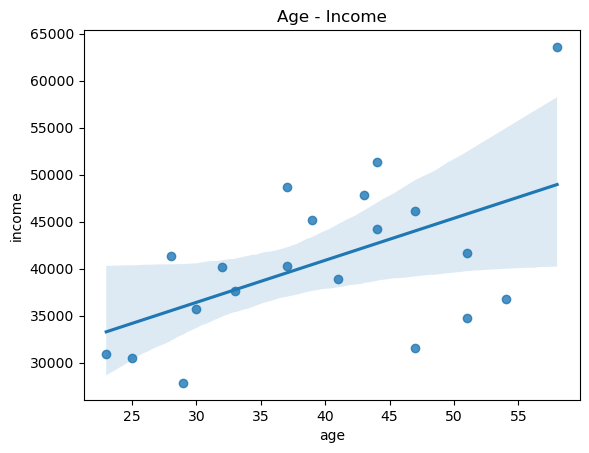

In [35]:
plt.title("Age - Income")
sns.regplot(x=df.age,y=df.income)
plt.show()

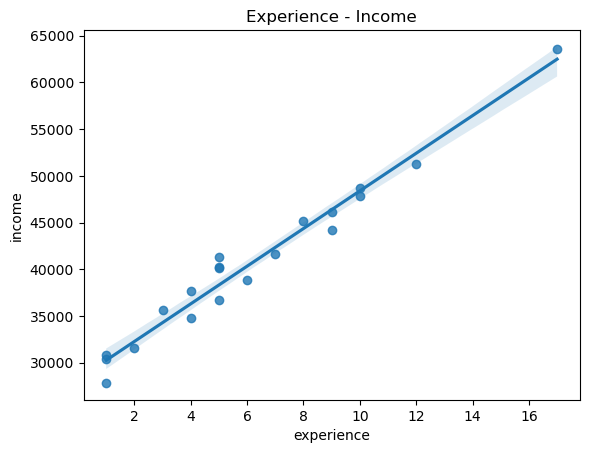

In [36]:
plt.title("Experience - Income")
sns.regplot(x=df.experience,y=df.income)
plt.show()

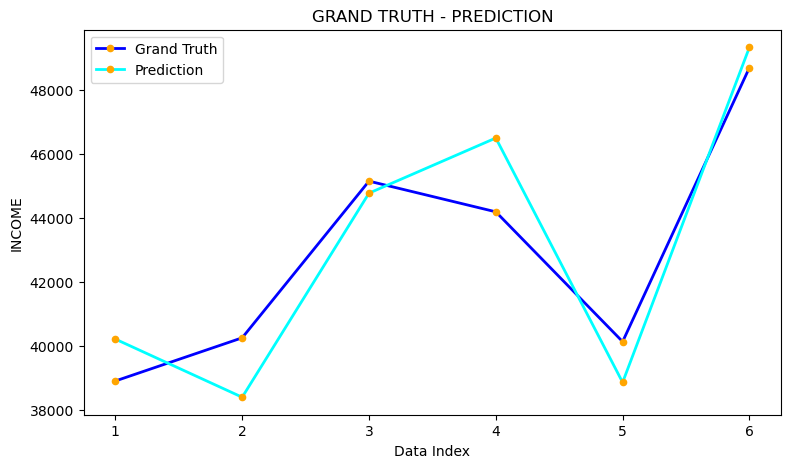

In [41]:
indexes = range(1,7)
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(indexes, y_test, label='Grand Truth', color='blue', linewidth=2,marker=".",ms=9,mfc="orange",mec="orange")
ax.plot(indexes, y_pred, label='Prediction', color='cyan', linewidth=2,marker=".",ms=9,mfc="orange",mec="orange")
plt.title('GRAND TRUTH - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('INCOME')
plt.legend(loc='upper left')
plt.show()

In [42]:
for i,j in zip(y_test,y_pred) : 
    print("Residuals: ",i-j)

Residuals:  [-1309.71334165]
Residuals:  [1857.9956617]
Residuals:  [376.27092114]
Residuals:  [-2308.57830916]
Residuals:  [1273.69679645]
Residuals:  [-637.74481606]


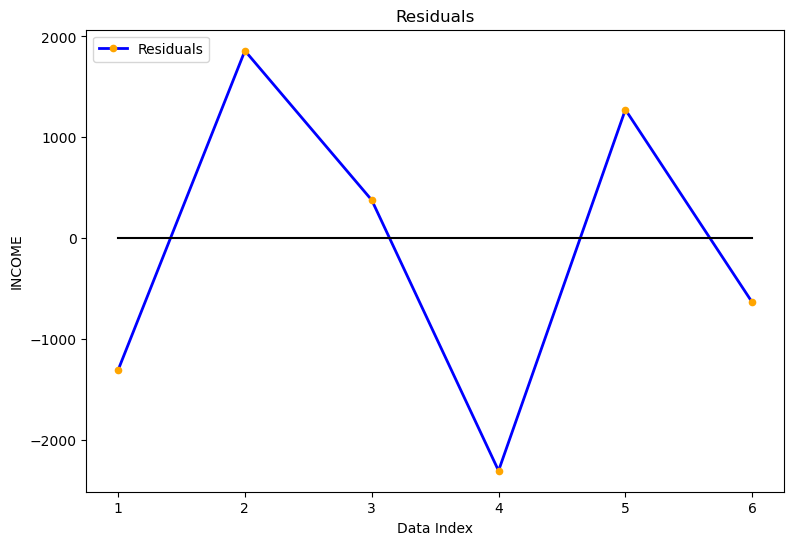

In [43]:
fig,axes = plt.subplots(figsize=(9,6))
axes.plot(indexes,y_test - y_pred,color='blue', linewidth=2,marker=".",ms=9,mfc="orange",mec="orange",label="Residuals")
axes.plot(indexes,np.zeros(6),color="black")

plt.title('Residuals')
plt.xlabel('Data Index')
plt.ylabel('INCOME')
plt.legend(loc='upper left')
plt.show()